(100,)


(-2.0, 30.0)

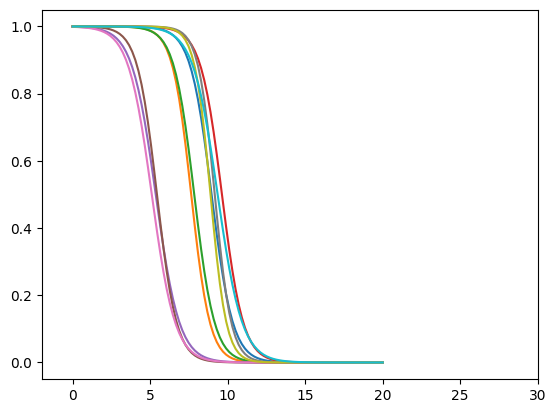

In [1]:
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(0)

domain = np.linspace(0, 20, 100)

slopes = np.random.uniform(low=0.8, high=2, size=10)
shifts = np.random.uniform(low = 5, high = 10, size = 10)
y = [1/(1+np.exp(slopes[i]*(domain - shifts[i]))) for i in range(len(slopes))]
print(domain.shape)
#print(y.shape)

fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(domain, y[i])
ax.set_xlim(-2,30)

In [2]:
y = np.array(y)

In [3]:
domain

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

(100,)


(-2.0, 30.0)

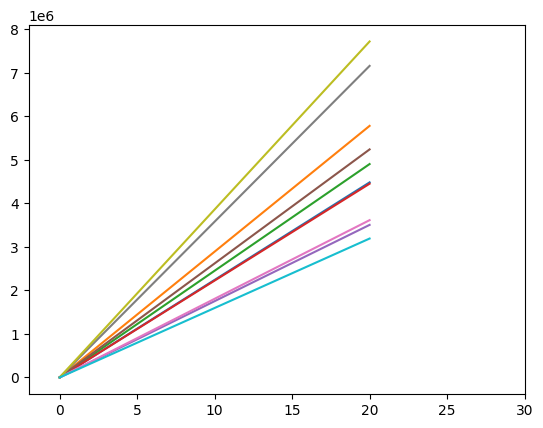

In [4]:
domain = np.linspace(0, 20, 100)

np.random.seed(0)

slopes = np.random.uniform(low=10000, high=400000, size=10)
deal_values = [slopes[i]*domain for i in range(len(slopes))]
print(domain.shape)
#print(y.shape)

fig, ax = plt.subplots()
for i in range(len(deal_values)):
    ax.plot(domain, deal_values[i])
ax.set_xlim(-2,30)

In [5]:
np.array(deal_values)

array([[      0.        ,   45260.05384478,   90520.10768956,
         135780.16153434,  181040.21537912,  226300.2692239 ,
         271560.32306867,  316820.37691345,  362080.43075823,
         407340.48460301,  452600.53844779,  497860.59229257,
         543120.64613735,  588380.69998213,  633640.75382691,
         678900.80767169,  724160.86151647,  769420.91536125,
         814680.96920602,  859941.0230508 ,  905201.07689558,
         950461.13074036,  995721.18458514, 1040981.23842992,
        1086241.2922747 , 1131501.34611948, 1176761.39996426,
        1222021.45380904, 1267281.50765382, 1312541.56149859,
        1357801.61534337, 1403061.66918815, 1448321.72303293,
        1493581.77687771, 1538841.83072249, 1584101.88456727,
        1629361.93841205, 1674621.99225683, 1719882.04610161,
        1765142.09994639, 1810402.15379116, 1855662.20763594,
        1900922.26148072, 1946182.3153255 , 1991442.36917028,
        2036702.42301506, 2081962.47685984, 2127222.53070462,
        

In [7]:
deal_volumes = np.array([max(deal_values[i]) for i in range(len(deal_values))])
deal_volumes

array([4480745.33063313, 5778477.05770487, 4901554.33335882,
       4450088.8273758 , 3504507.43484346, 5237974.08191992,
       3613180.247849  , 7155829.40610022, 7716569.53190803,
       3190843.84684107])

(-2.0, 30.0)

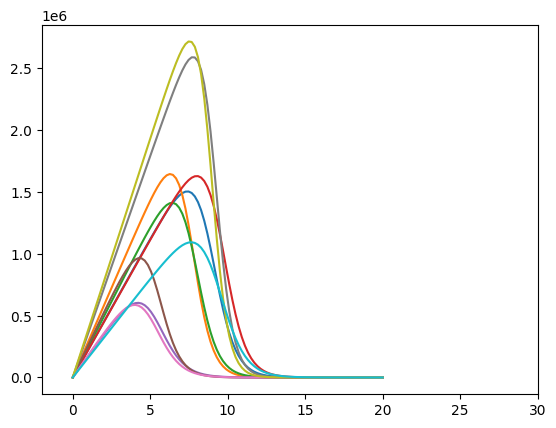

In [8]:

ev = [y[i]*deal_values[i] for i in range(len(y))]

fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(domain, ev[i])
ax.set_xlim(-2,30)

In [9]:
optimals = np.argmax(ev, axis=1)
median = np.median(optimals)

In [10]:
x = np.where(np.argmax(ev, axis=1) < median, 0, 1)
x

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [11]:
ev = np.array(ev)
ev.shape

(10, 100)

6.8686868686868685
-12396197.20232429
50029770.098534316
0.7214666273659905


(-2.0, 30.0)

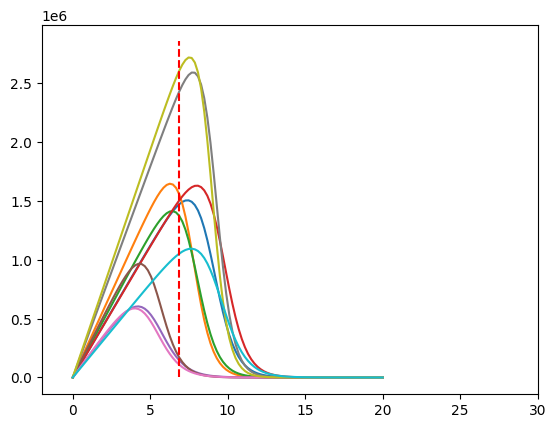

In [19]:
#What would be the optimal value for these original curves?

prices = domain

#original optimal loss is 

def compute_loss(price_index, ev):
    return (-ev[:,price_index]).sum()

def min_price_index(ev, prices):
    min_loss = float("inf")
    arg_min = -1
    for index, price in enumerate(prices):
        loss = compute_loss(index, ev)
        if loss < min_loss:
            min_loss = loss
            arg_min = index
    return arg_min, min_loss

arg_min, min_loss = min_price_index(ev, prices)
print(prices[arg_min])
print(min_loss)
volume = deal_volumes.sum()
volume_won = (y[:,arg_min].reshape(-1)*deal_volumes).sum()
print(volume) # volume
print(volume_won / volume) # volume win rate at this node

fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(domain, ev[i])
ax.vlines(prices[arg_min], 0, ax.get_ylim()[1], colors="red", linestyles="dashed")
ax.set_xlim(-2,30)




In [23]:
#simulate what a flat 80% of total volume would look like
0.8 * deal_volumes.sum()

40023816.078827456

In [13]:
ev_left = ev[x == 0]
ev_right = ev[x == 1]
y_left = y[x == 0]
y_right = y[x == 1]
deal_volumes_left = deal_volumes[x == 0]
deal_volumes_right = deal_volumes[x == 1]
ev_left.shape

(5, 100)

4.848484848484849
-4543771.479189728
18743057.35165763
0.8136528484292334


(-2.0, 30.0)

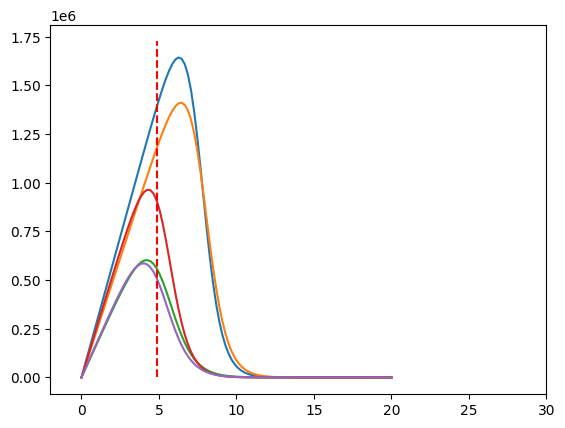

In [17]:
arg_min_left, min_loss_left = min_price_index(ev_left, prices)

print(prices[arg_min_left])
print(min_loss_left)
volume_left = deal_volumes_left.sum()
volume_won_left = (y_left[:,arg_min_left].reshape(-1)*deal_volumes_left).sum()
print(volume_won_left) # volume
print(volume_won_left / volume_left) # volume win rate at this node
fig, ax = plt.subplots()
for i in range(len(ev_left)):
    ax.plot(domain, ev_left[i])
ax.vlines(prices[arg_min_left], 0, ax.get_ylim()[1], colors="red", linestyles="dashed")
ax.set_xlim(-2,30)

7.6767676767676765
-9491911.305497581
24728926.822217382
0.9160871429152481


(-2.0, 30.0)

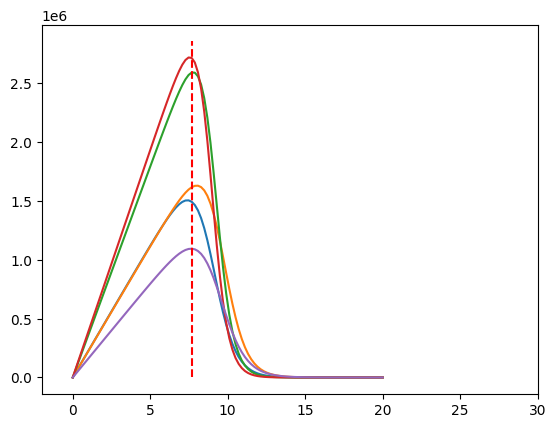

In [25]:
arg_min_right, min_loss_right = min_price_index(ev_right, prices)
print(prices[arg_min_right])
print(min_loss_right)
volume_right = deal_volumes_right.sum()
volume_won_right = (y_right[:,arg_min_right].reshape(-1)*deal_volumes_right).sum()
print(volume_won_right) # volume
print(volume_won_right / volume_right) # volume win rate at this node

fig, ax = plt.subplots()
for i in range(len(ev_right)):
    ax.plot(domain, ev_right[i])
ax.vlines(prices[arg_min_right], 0, ax.get_ylim()[1], colors="red", linestyles="dashed")
ax.set_xlim(-2,30)

In [46]:
print(min_loss_left)
print(min_loss_right)
print(min_loss)

-4543771.479189728
-9491911.305497581
-12396197.20232429


In [47]:
min_loss_left + min_loss_right

-14035682.78468731

In [48]:
min_loss_left + min_loss_right < min_loss

True

In [20]:
volume_won_left + volume_won_right

43471984.17387501

In [21]:
volume_won

36094809.500885434

In [22]:
volume_won_left + volume_won_right > volume_won

True